<a href="https://colab.research.google.com/github/solanki13/Medical-Insurance-Cost/blob/main/medical_insurance_cost1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold

##2. Dataset upload and read

In [ ]:
from google.colab import files
uploaded=files.upload()

df = pd.read_csv('medical_insurance.csv')
df.head()


Saving medical_insurance.csv to medical_insurance.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##3. Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


###A.Information about data:
#### No. of rows :- 2772
#### No. of columns :- 7
#### Datatype :- OBJECT = {sex, smoker, region,}, Integer = {age, children}, float= {bmi, charges}

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2767,True
2768,True
2769,True
2770,True


In [ ]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.duplicated().sum()

np.int64(1435)

In [ ]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

[2772 rows x 7 columns]>


### Visualization using boxplot to check outliers

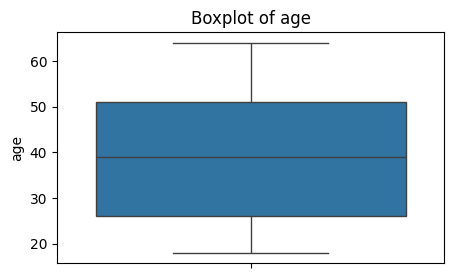

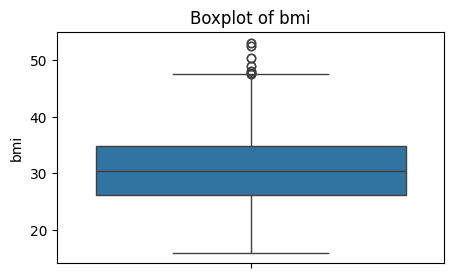

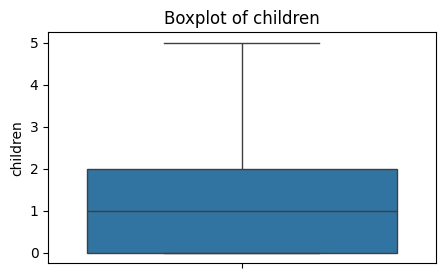

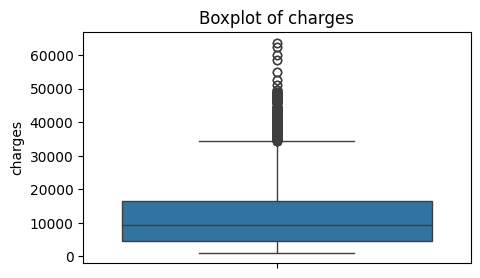

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(5,3))
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


In [ ]:
# outlier
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3-Q1

l_bound = Q1-IQR*1.5
u_bound = Q3+IQR*1.5

outliers =df[(df['charges']<l_bound) | (df['charges']>u_bound)]
outliers

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760
...,...,...,...,...,...,...,...
2735,52,male,41.80,2,yes,southeast,47269.8540
2736,64,male,36.96,2,yes,southeast,49577.6624
2744,32,male,33.63,1,yes,northeast,37607.5277
2764,22,female,31.02,3,yes,southeast,35595.5898


### BMI divided into different categories (Underweight, Normal, Overweight)

In [ ]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)

##4. EDA

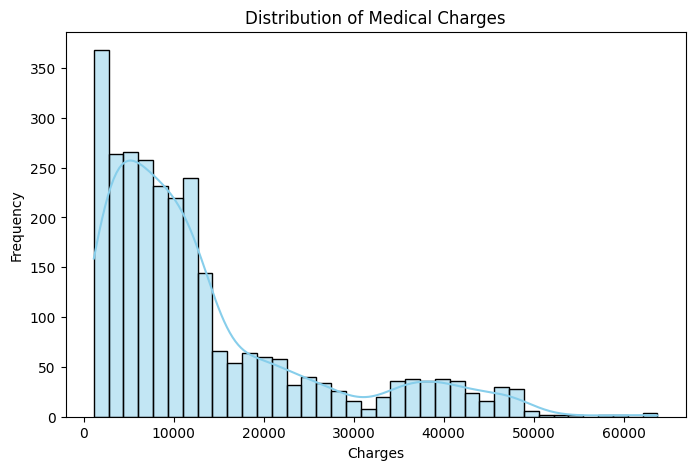

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True, color='skyblue')
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

### The distribution of charges is heavily right-skewed indicating a few very high medical bills.

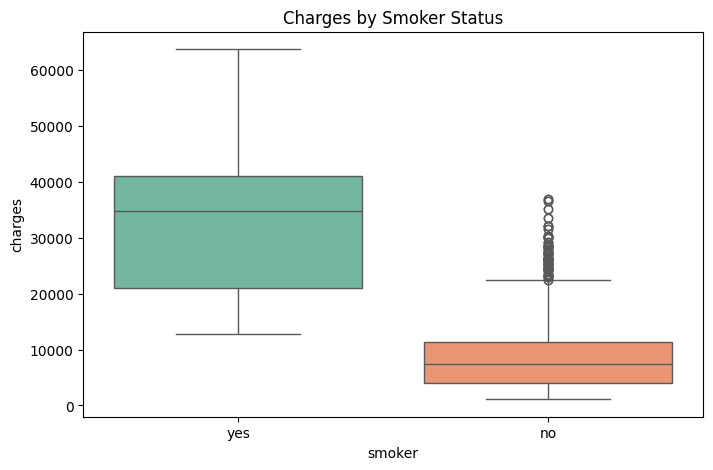

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=df, hue='smoker', palette='Set2', legend=False)
plt.title('Charges by Smoker Status')
plt.show()

### Smokers have significantly higher medical charges compared to non-smokers.

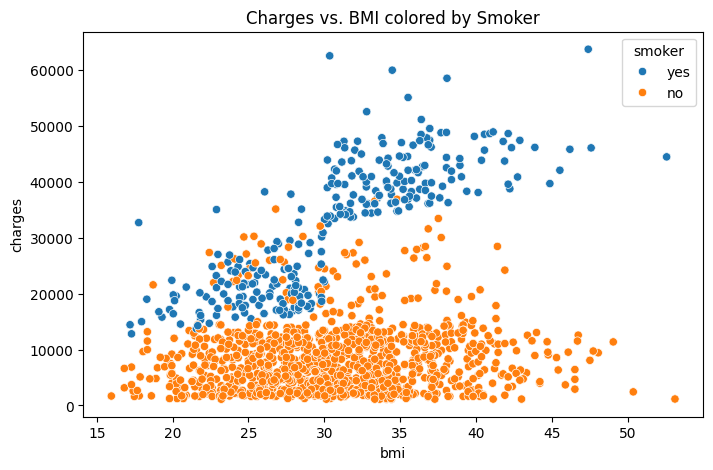

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Charges vs. BMI colored by Smoker')
plt.show()


### Higher BMI combined with smoking leads to very high medical charges.

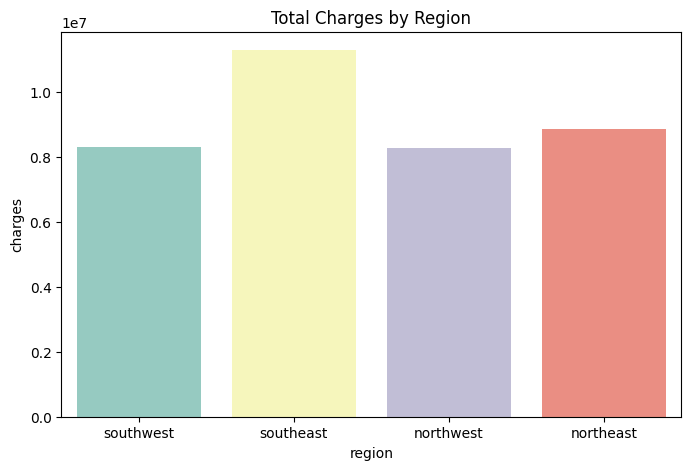

In [ ]:
# Visualization: Total Charges by Region (updated version, no warnings)
plt.figure(figsize=(8,5))
sns.barplot(x='region', y='charges', data=df, estimator=sum, errorbar=None, hue='region', palette='Set3', legend=False)
plt.title('Total Charges by Region')
plt.show()


### Some regions may contribute more to total charges, possibly due to population differences or healthcare costs

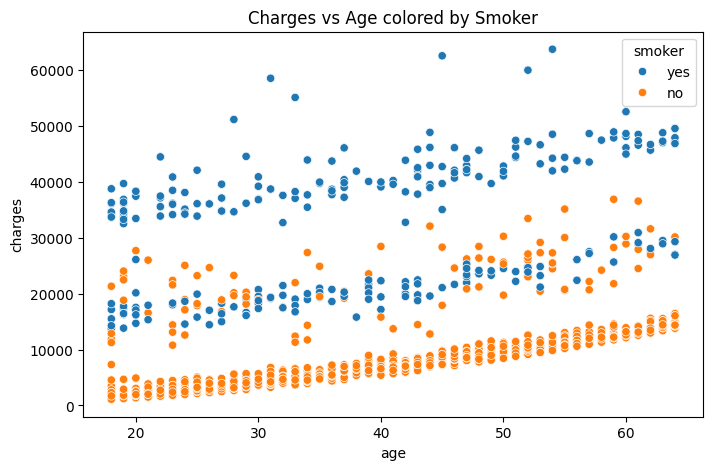

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Charges vs Age colored by Smoker')
plt.show()


### Medical charges tend to increase with age, especially for smokers.

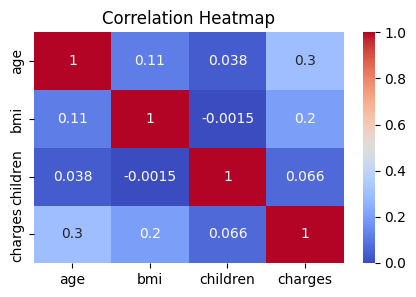

In [ ]:
# Correlation heatmap
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


*   1. smoker is categorical, but in most datasets it’s usually encoded as binary (yes=1, no=0).
*   2. BMI, age, and number of children have moderate positive correlation with charges.
*  3. Age and BMI both contribute to increasing medical expenses.

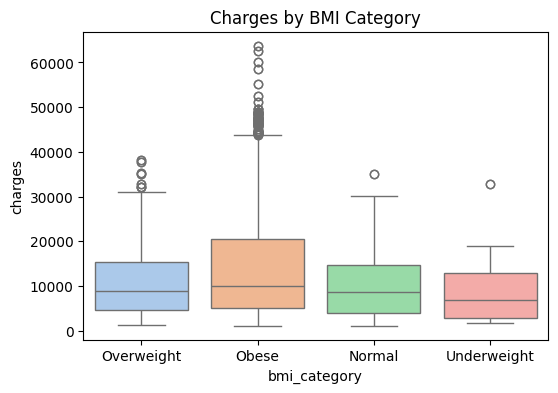

In [ ]:
# Create BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)

# Plot charges by BMI category
plt.figure(figsize=(6,4))
sns.boxplot(x='bmi_category', y='charges', hue='bmi_category', data=df, palette='pastel', legend=False)
plt.title('Charges by BMI Category')
plt.show()


*   Obese individuals have much higher charges, especially when combined with smoking.
*   Weight management programs could significantly reduce insurance costs.
*  BMI clearly affects medical charges.
*   The outliers may reflect serious medical conditions, surgeries, or chronic diseases — real-world expensive cases.






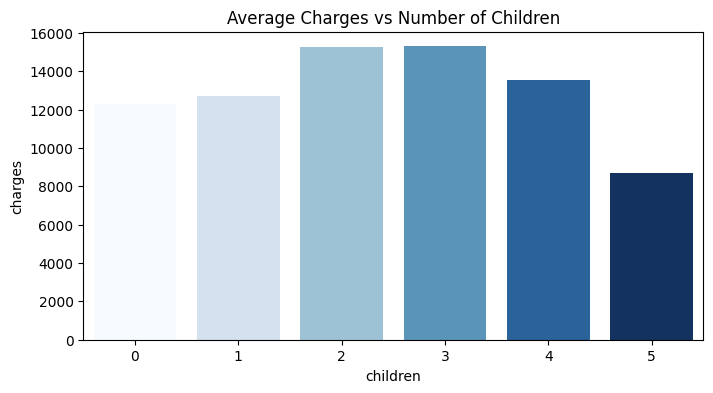

In [ ]:
# Charges vs number of children
plt.figure(figsize=(8,4))
sns.barplot(x='children', y='charges', hue='children', data=df, estimator='mean', errorbar=None, palette='Blues', legend=False)
plt.title('Average Charges vs Number of Children')
plt.show()


*   Number of children has less significant impact on charges.
*   Small variations but not a strong driver of medical costs.



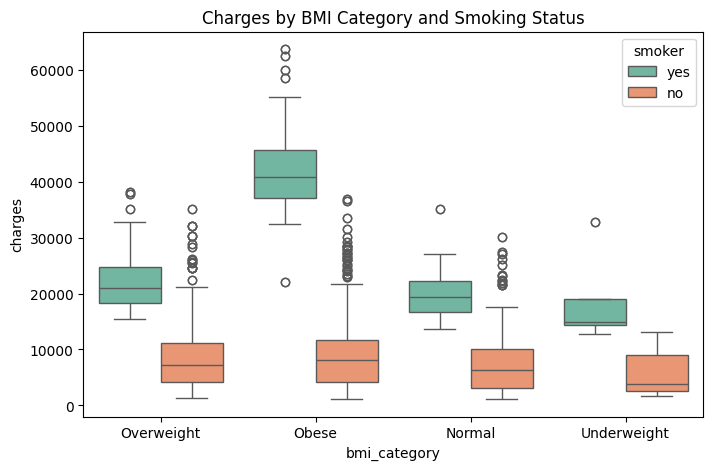

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='bmi_category', y='charges', hue='smoker', data=df, palette='Set2')
plt.title('Charges by BMI Category and Smoking Status')
plt.show()


*   Smokers in the Obese category have the highest medical charges.
*   Prevention programs targeting obesity and smoking together can save huge healthcare costs.



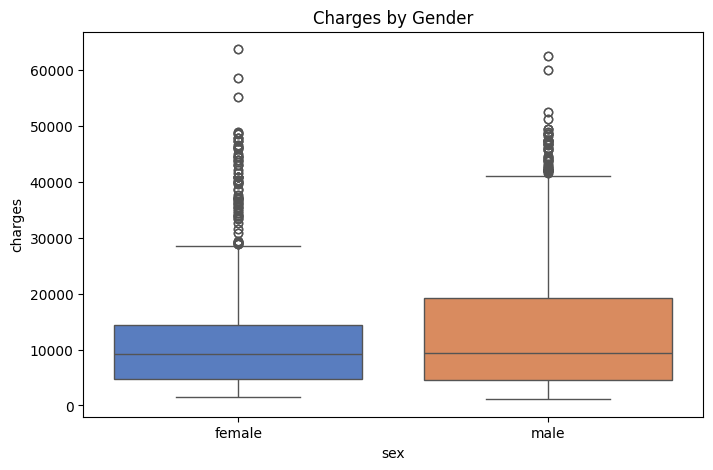

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='charges', hue='sex', data=df, palette='muted', legend=False)
plt.title('Charges by Gender')
plt.show()


*   Gender does not significantly affect charges overall.
*   Any differences are likely driven by smoking, BMI, and age rather than gender itself



#### Summary of Insights


*   Age and BMI are key drivers of charges.
*   Smoking multiplies costs heavily, especially combined with obesity.

*   Gender has minimal effect on charges.
*   Children count doesn’t strongly affect charges.

*  Regional differences exist, but more population data is needed to normalize.

###5. Feature engineering

In [ ]:
df['bmi_smoker'] = df['bmi'] * (df['smoker'] == 'yes').astype(int)
df['age_smoker'] = df['age'] * (df['smoker'] == 'yes').astype(int)
df['bmi_age'] = df['bmi'] * df['age']

In [ ]:
x=df.drop('charges', axis=1)
y=df['charges']

In [ ]:
num_features = ['age', 'children', 'bmi_smoker', 'age_smoker', 'bmi_age']
cat_features = ['sex', 'smoker', 'region']


##6. Train Test spliting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##7. Standradization and Normalization

In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

In [ ]:
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])


In [ ]:
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5]
}

##8. Model Training by GradientBoostingRegressor

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
grid_search = GridSearchCV(pipeline_gb, param_grid, cv=cv, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'children',
                                                                          'bmi_smoker',
                                                                          'age_smoker',
                                                                          'bmi_age']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('regressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.05, 0.1, 0.2],
                         'regressor__max_depth': [3, 4, 5],
                         'regressor__n_estimators': [100, 200, 300]},
             scoring='r2')

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 5, 'regressor__n_estimators': 300}


##9. Model Evaluation

In [ ]:
y_pred = grid_search.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.9612221706607859
MAE: 774.6618824051596
RMSE: 2439.602091365114


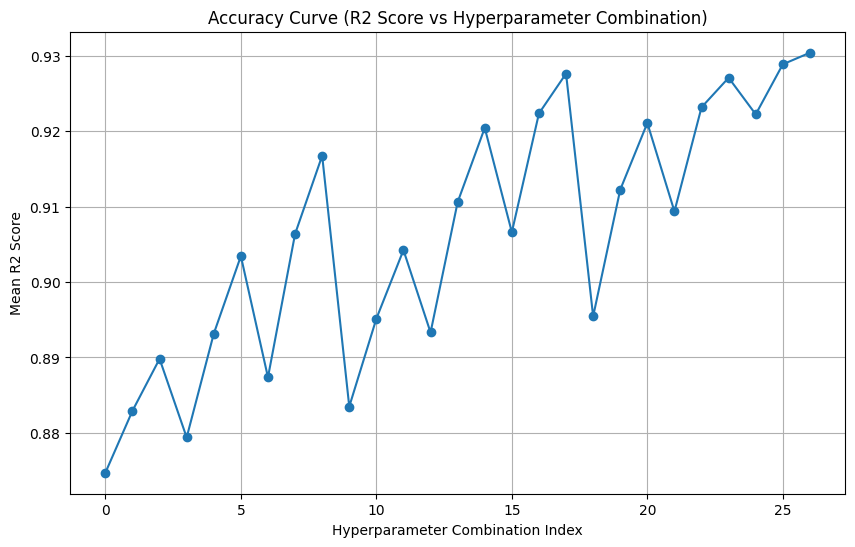

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10,6))
plt.plot(results['mean_test_score'], marker='o')
plt.title('Accuracy Curve (R2 Score vs Hyperparameter Combination)')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Mean R2 Score')
plt.grid()
plt.show()

#### Comparion of Actual and Predicted values

In [ ]:
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(comparison.head(10))

           Actual     Predicted
1106   8988.15875   9145.165294
1321  28101.33305  28245.565191
2313  12032.32600  12078.701658
2274   1682.59700   1682.775334
1432   3393.35635   3970.591161
2240  24106.91255  24091.551910
965    4746.34400   4586.713425
2626  47269.85400  47280.238837
2134   8556.90700   9132.579098
2296   2639.04290   2569.876572


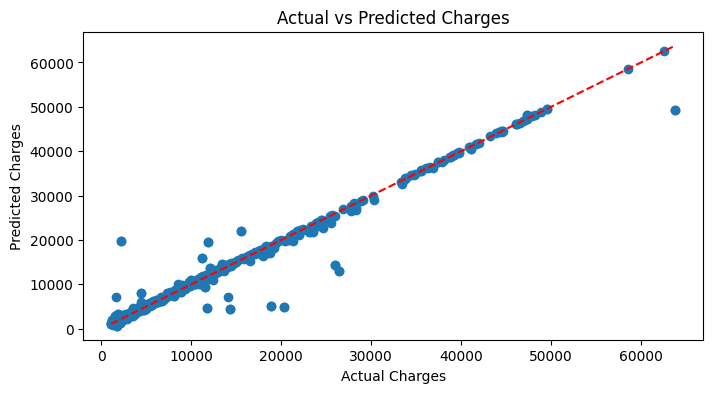

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

#### Feature importance plot

In [ ]:
best_model = grid_search.best_estimator_.named_steps['regressor']
feature_names_num = num_features
feature_names_cat = grid_search.best_estimator_.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_features)
all_feature_names = np.concatenate([feature_names_num, feature_names_cat])
importances = best_model.feature_importances_

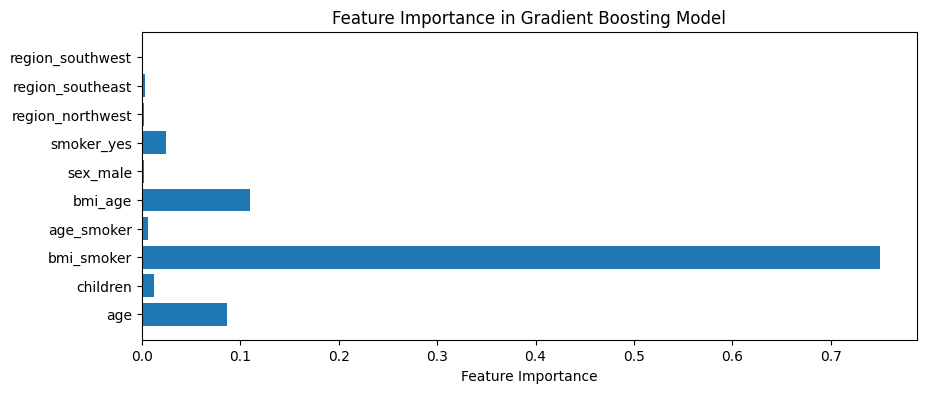

In [ ]:
plt.figure(figsize=(10,4))
plt.barh(all_feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Gradient Boosting Model")
plt.show()

##10. Deployement of model

In [ ]:
import joblib
joblib.dump(grid_search.best_estimator_, 'insurance_model.pkl')
print("Model saved as insurance_model.pkl")

Model saved as insurance_model.pkl


In [ ]:
loaded_model = joblib.load('insurance_model.pkl')

##11. Testing the model on new inputs

In [ ]:
def test_model(new_data):
    try:
        new_df = pd.DataFrame([new_data])
        new_df['bmi_smoker'] = new_df['bmi'] * (new_df['smoker'] == 'yes').astype(int)
        new_df['age_smoker'] = new_df['age'] * (new_df['smoker'] == 'yes').astype(int)
        new_df['bmi_age'] = new_df['bmi'] * new_df['age']
        prediction = loaded_model.predict(new_df)
        print("Predicted Charges:", prediction[0])
    except Exception as e:
        print("Error in prediction:", e)


In [ ]:
test_input = {
    'age': 35,
    'sex': 'female',
    'bmi': 28.0,
    'children': 2,
    'smoker': 'no',
    'region': 'northwest'
}
test_model(test_input)

Predicted Charges: 6890.823557366933


In [ ]:
sample_idx = 5
sample_input = X_test.iloc[sample_idx].to_dict()
actual_charge = y_test.iloc[sample_idx]
test_model(sample_input)
print("Actual Charges:", actual_charge)


Predicted Charges: 24091.551910106045
Actual Charges: 24106.91255
